In [1]:
ITERATIONS = 100
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def derivative(x):
    return 4*(x**3)

def derivative2(x):
    return 12*(x**2)

def gradient_update(x_old, alpha):
    x_new = x_old - alpha*derivative(x_old)
    return x_new

def get_steep_desc_function(x_old, deriv):
    def _min(x):
        return (x_old - x*deriv)**4
    return _min
def steep_update(x_old):
    min_function = get_steep_desc_function(x_old, derivative(x_old))
    result = optimize.minimize_scalar(min_function)
    if result.success:
        alpha = result.x
#         print("steep alpha is: ", alpha)
        x_new = x_old - alpha*derivative(x_old)
        return x_new
    else:
        return "ERROR!"
def newton_update(x_old, alpha):
    x_new = x_old - alpha*(derivative(x_old)/derivative2(x_old))
    return x_new

def gradient_descent(x_init, alpha):
    x_vals = []
    x = x_init
    for i in range(ITERATIONS):
        x_vals.append(x)
        x = gradient_update(x, alpha)
        
    return x_vals

def steepest_descent(x_init):
    x_vals = []
    x = x_init
    for i in range(ITERATIONS):
        x_vals.append(x)
        x = steep_update(x)
    return x_vals

def newton_direction_desc(x_init, alpha):
    x_vals = []
    x = x_init
    for i in range(ITERATIONS):
        x_vals.append(x)
        x = newton_update(x, alpha)
        
    return x_vals
        
def plot_values(x_vals, title_str):
    iterations = [i for i in range(ITERATIONS)]
    plt.plot(iterations, x_vals)
    plt.xlabel("Num Iterations")
    plt.ylabel("Value of X")
    plt.title(title_str)
    plt.show()
    
def plot_steep_desc(x_vals):
    iterations = [i for i in range(ITERATIONS)]
    plt.plot(iterations, x_vals)
    plt.xlabel("Num Iterations")
    plt.ylabel("Value of X")
    title_str = "Descent of X with optimal step size: "
    plt.title(title_str)
    plt.show()
    
def plot_mult_values(x_vals_arr, labels):
    iterations = [i for i in range(ITERATIONS)]
    for i in range(len(x_vals_arr)):
        label_str = labels[i]
        plt.plot(iterations, x_vals_arr[i], label=label_str)

    plt.xlabel("Num Iterations")
    plt.ylabel("Value of X")
    title_str = "Descent of X"
    plt.title(title_str)
    plt.legend()
    plt.show()  
    
    

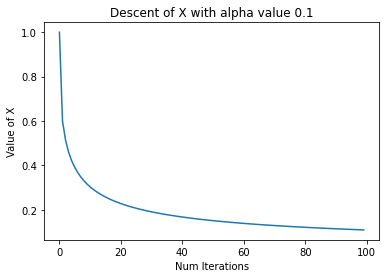

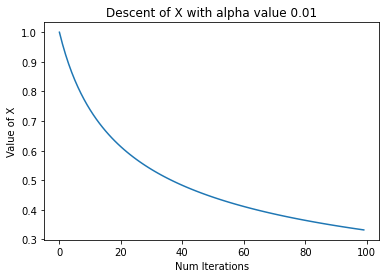

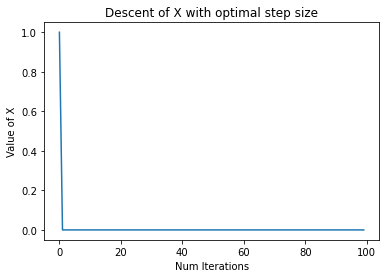

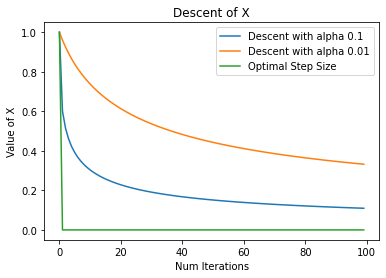

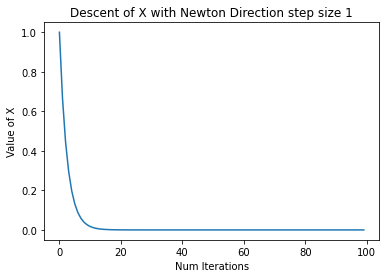

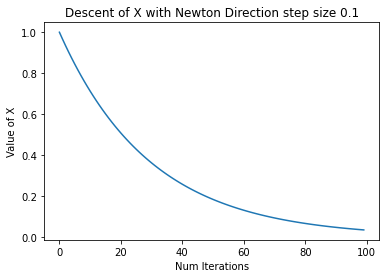

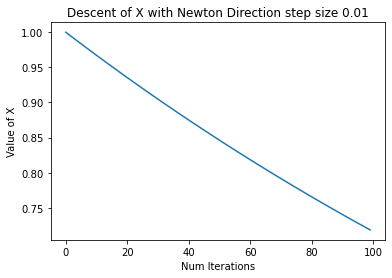

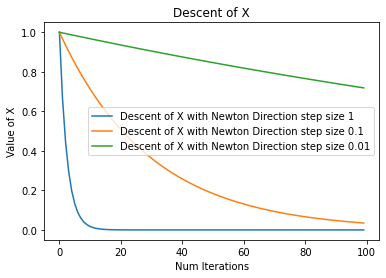

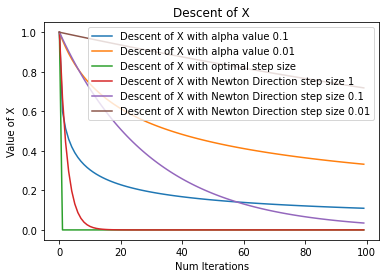

In [3]:
def main():
    x_val_1 = gradient_descent(1,0.1)
    plot_values(x_val_1, "Descent of X with alpha value 0.1")
    
    x_val_2 = gradient_descent(1,0.01)
    plot_values(x_val_2, "Descent of X with alpha value 0.01")
    
    x_val_arr = [x_val_1, x_val_2]
    alpha_arr = [0.1, 0.01]
    
    x_val_3 = steepest_descent(1)
    
    plot_values(x_val_3, "Descent of X with optimal step size")
    
    x_val_arr = [x_val_1, x_val_2, x_val_3]
    label_arr = ["Descent with alpha 0.1", "Descent with alpha 0.01", "Optimal Step Size"]
    plot_mult_values(x_val_arr, label_arr)
    x_val_4 = newton_direction_desc(1, 1)
    plot_values(x_val_4, "Descent of X with Newton Direction step size 1")
    
    x_val_5 = newton_direction_desc(1, 0.1)
    plot_values(x_val_5, "Descent of X with Newton Direction step size 0.1")
    
    x_val_6 = newton_direction_desc(1, 0.01)
    plot_values(x_val_6, "Descent of X with Newton Direction step size 0.01")
    
    x_val_arr = [x_val_4, x_val_5, x_val_6]
    label_arr = ["Descent of X with Newton Direction step size 1", "Descent of X with Newton Direction step size 0.1", 
                 "Descent of X with Newton Direction step size 0.01"]
    
    plot_mult_values(x_val_arr, label_arr)
    
    x_val_arr = [x_val_1, x_val_2, x_val_3, x_val_4, x_val_5, x_val_6]
    label_arr = ["Descent of X with alpha value 0.1", "Descent of X with alpha value 0.01", "Descent of X with optimal step size",
                "Descent of X with Newton Direction step size 1", "Descent of X with Newton Direction step size 0.1",
                "Descent of X with Newton Direction step size 0.01"]
    
    plot_mult_values(x_val_arr, label_arr)
    
if __name__ == "__main__":
    main()